In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
loan_data= pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")

In [4]:
loan_data.head()

Loan_ID Gender Married  ... Credit_History Property_Area Loan_Status
0  LP001002   Male      No  ...            1.0         Urban           Y
1  LP001003   Male     Yes  ...            1.0         Rural           N
2  LP001005   Male     Yes  ...            1.0         Urban           Y
3  LP001006   Male     Yes  ...            1.0         Urban           Y
4  LP001008   Male      No  ...            1.0         Urban           Y

[5 rows x 13 columns]

In [6]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
loan_data= loan_data.dropna()

In [8]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
loan_data.describe()

ApplicantIncome  CoapplicantIncome  ...  Loan_Amount_Term  Credit_History
count       480.000000         480.000000  ...        480.000000      480.000000
mean       5364.231250        1581.093583  ...        342.050000        0.854167
std        5668.251251        2617.692267  ...         65.212401        0.353307
min         150.000000           0.000000  ...         36.000000        0.000000
25%        2898.750000           0.000000  ...        360.000000        1.000000
50%        3859.000000        1084.500000  ...        360.000000        1.000000
75%        5852.500000        2253.250000  ...        360.000000        1.000000
max       81000.000000       33837.000000  ...        480.000000        1.000000

[8 rows x 5 columns]

In [15]:
loan_data["Loan_Status"].value_counts()

Loan_Status
1    332
0    148
Name: count, dtype: int64

In [11]:
loan_data= loan_data.replace({"Loan_Status": {"N":0, "Y":1}})

/tmp/ipython-input-11-3634166654.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data= loan_data.replace({"Loan_Status": {"N":0, "Y":1}})


In [12]:
loan_data.head()

Loan_ID Gender Married  ... Credit_History Property_Area Loan_Status
1  LP001003   Male     Yes  ...            1.0         Rural           0
2  LP001005   Male     Yes  ...            1.0         Urban           1
3  LP001006   Male     Yes  ...            1.0         Urban           1
4  LP001008   Male      No  ...            1.0         Urban           1
5  LP001011   Male     Yes  ...            1.0         Urban           1

[5 rows x 13 columns]

In [14]:
loan_data["Property_Area"].value_counts()

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64

In [16]:
loan_data= loan_data.replace({"Property_Area": {"Rural":0, "Semiurban":1, "Urban":2}})

In [18]:
loan_data["Self_Employed"].value_counts()

Self_Employed
No     414
Yes     66
Name: count, dtype: int64

In [28]:
loan_data= loan_data.replace({"Self_Employed": {"No":0, "Yes":1}})

In [20]:

loan_data["Education"].value_counts()

Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64

In [22]:
loan_data= loan_data.replace({"Education": {"Not Graduate":0, "Graduate":1}})

In [23]:
loan_data["Married"].value_counts()

Married
Yes    311
No     169
Name: count, dtype: int64

In [24]:
loan_data= loan_data.replace({"Married": {"No":0, "Yes":1}})

/tmp/ipython-input-24-2045311455.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data= loan_data.replace({"Married": {"No":0, "Yes":1}})


In [25]:

loan_data["Gender"].value_counts()

Gender
Male      394
Female     86
Name: count, dtype: int64

In [26]:
loan_data= loan_data.replace({"Gender": {"Female":0, "Male":1}})

/tmp/ipython-input-26-4292439228.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data= loan_data.replace({"Gender": {"Female":0, "Male":1}})


In [29]:
loan_data.head()

Loan_ID  Gender  Married  ... Credit_History  Property_Area  Loan_Status
1  LP001003       1        1  ...            1.0              0            0
2  LP001005       1        1  ...            1.0              2            1
3  LP001006       1        1  ...            1.0              2            1
4  LP001008       1        0  ...            1.0              2            1
5  LP001011       1        1  ...            1.0              2            1

[5 rows x 13 columns]

In [30]:
loan_data["Dependents"].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [31]:
loan_data= loan_data.replace(to_replace="3+", value=4)

<Axes: xlabel='Education', ylabel='count'>

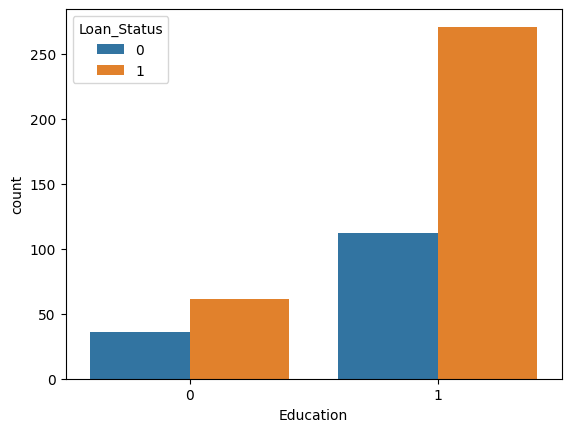

In [34]:
sns.countplot(x="Education", hue="Loan_Status", data= loan_data)

<Axes: xlabel='Married', ylabel='count'>

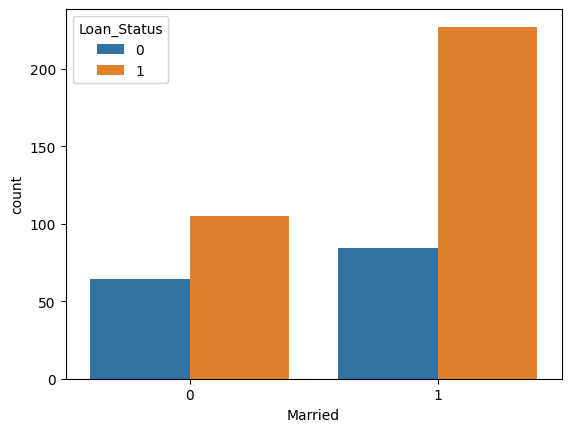

In [35]:
sns.countplot(x="Married", hue="Loan_Status", data= loan_data)

In [39]:
x= loan_data.drop(columns=["Loan_ID", "Loan_Status"], axis=1)
y= loan_data["Loan_Status"]

In [40]:
x

Gender  Married  ... Credit_History  Property_Area
1         1        1  ...            1.0              0
2         1        1  ...            1.0              2
3         1        1  ...            1.0              2
4         1        0  ...            1.0              2
5         1        1  ...            1.0              2
..      ...      ...  ...            ...            ...
609       0        0  ...            1.0              0
610       1        1  ...            1.0              0
611       1        1  ...            1.0              2
612       1        1  ...            1.0              2
613       0        0  ...            0.0              1

[480 rows x 11 columns]

In [41]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [42]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, stratify=y, random_state=2)

In [47]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(384, 11)
(96, 11)
(384,)
(96,)


In [48]:
classifier= svm.SVC(kernel="linear")

In [49]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [52]:
train_data_predict = classifier.predict(x_train)
train_data_predict_accuracy = accuracy_score(train_data_predict, y_train)

print("the accuracy for training data is:", train_data_predict_accuracy*100, "%")

the accuracy for training data is: 77.86458333333334 %


In [53]:
test_data_predict = classifier.predict(x_test)
test_data_predict_accuracy = accuracy_score(test_data_predict, y_test)

print("the accuracy for testing data is:", test_data_predict_accuracy*100, "%")

the accuracy for testing data is: 81.25 %


In [59]:
input_data= (1,	0	,2	,1	,0	,4354	,0.0	,136.0	,360.0	,1.0	,0)


input_data= np.array(input_data).reshape(1, -1)

prediction=classifier.predict(input_data)

print(prediction[0])

if(prediction[0]==1):
  print("Eligible for loan")
else:
  print("Not eligible")

1
Eligible for loan


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
